# CYBERBULLYING CLASSIFICATION - EQUIPO 4





## DATASET

[Dataset: Cyberbullying Classification](https://www.kaggle.com/datasets/andrewmvd/cyberbullying-classification/data)

## IMPORTS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import re
import nltk
import spacy
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter
from nltk.tokenize import word_tokenize
import plotly.express as px
from textblob import TextBlob

import os
!pip install transformers[torch]
!pip install accelerate -U
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
import torch
from torch.utils.data import Dataset
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, ConfusionMatrixDisplay,classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 3.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

## INTRODUCCION

In [2]:
url = "https://raw.githubusercontent.com/noequalindi/1000IA_course/main/cyberbullying_tweets.csv"
df_raw = pd.read_csv(url, sep=',')
df_raw.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [ ]:
df_raw.describe()

,tweet_text,cyberbullying_type
count,47692,47692
unique,46017,6
top,RT @sailorhg: the intro for my hardware hackin...,religion
freq,2,7998


In [ ]:
categorias_unicas = df_raw.iloc[:, 1].unique()

print("Categorías existentes en la columna cyberbullying_type:")
for categoria in categorias_unicas:
    print(categoria)


Categorías existentes en la columna cyberbullying_type:
not_cyberbullying
gender
religion
other_cyberbullying
age
ethnicity



RESUMEN
***

1. Título:  
 Cyberbullying Classification

2. Fuente:  

    J. Wang, K. Fu, C.T. Lu, “SOSNet: A Graph Convolutional Network Approach to Fine-Grained Cyberbullying Detection,” Proceedings of the 2020 IEEE International Conference on Big Data (IEEE BigData 2020), December 10-13, 2020.

3. Información relevante:  

  A medida que el uso de las redes sociales se vuelve cada vez más frecuente en todos los grupos de edad, una gran mayoría de los ciudadanos confía en este medio esencial para la comunicación diaria. La ubicuidad de las redes sociales significa que el ciberacoso puede afectar a cualquiera, en cualquier momento y en cualquier lugar, y el relativo anonimato de Internet hace que estos ataques personales sean más difíciles de detener que el acoso tradicional. El 15 de abril de 2020, UNICEF emitió una advertencia en respuesta al mayor riesgo de ciberacoso durante la pandemia de COVID-19 debido al cierre generalizado de las escuelas, el aumento del tiempo frente a pantallas y la disminución de la interacción social cara a cara. Las estadísticas del ciberacoso son francamente alarmantes: el 36,5% de los estudiantes de secundaria y preparatoria han sentido ciberacoso y el 87% han observado ciberacoso, con efectos que van desde una disminución en el rendimiento académico hasta depresión y pensamientos suicidas. A la luz de todo esto, este conjunto de datos contiene más de 47.000 tuits etiquetados según el tipo de ciberacoso.


4. Instancias: 47692

6. Atributos: 2

7. Información de los atributos:  
  Verificamos que el dataframe posee 47692 registros, sin registros que contengan valores nulos y 2 columnas de las cuales la columna 'cyberbullying_type' sera nuestra variable objetivo categórica no ordinal, este atributo posee 6 clases únicas las cuales son:    

  *   not_cyberbullying
  *   gender
  *   religion
  *   other_cyberbullying
  *   age
  *   ethnicity   

  El atributo restante es de tipo texto por lo que podemos determinar que se trata de un problema de Clasificación. No obstante nos encontramos con registros duplicados ya que como único se identfica un total de 46017 sobre 47692. Verificamos la doocumentacón de kaggle y encontramos esta información: *The data has been balanced in order to contain ~8000 of each class.* por lo que decidimos no eliminar los duplicados.




## ANÁLISIS EXPLORATORIO DE DATOS

### Análisis univariado de la variable objetivo

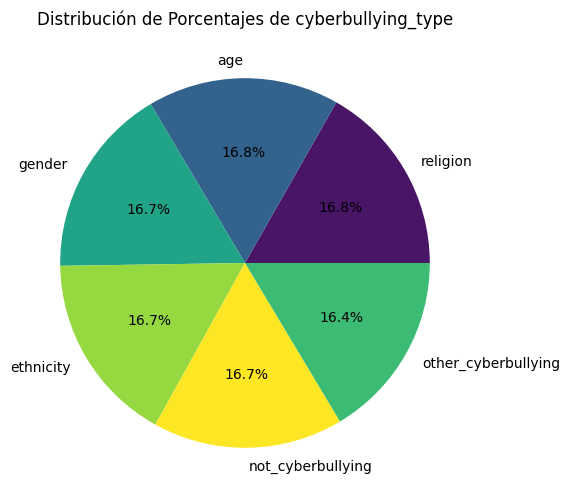

In [ ]:
class_counts = df_raw['cyberbullying_type'].value_counts()
colors = ['#481567', '#33638D', '#20A387', '#95D840', '#FDE725', '#3CBB75']
plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Distribución de Porcentajes de cyberbullying_type')
plt.show()

<ipython-input-7-a2898518a212>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_raw, x='cyberbullying_type', palette='viridis')


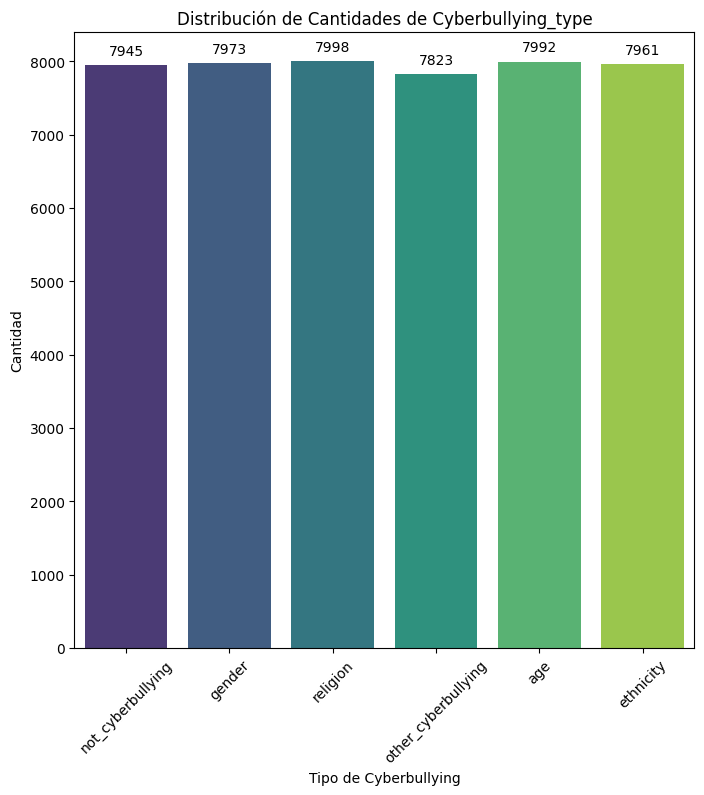

In [ ]:
plt.figure(figsize=(8, 8))
ax = sns.countplot(data=df_raw, x='cyberbullying_type', palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Tipo de Cyberbullying')
plt.ylabel('Cantidad')
plt.title('Distribución de Cantidades de Cyberbullying_type')
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,
        p.get_height() + 100,
        f'{int(p.get_height())}',
        ha='center',
        va='bottom'
    )

plt.show()

### Análisis de estadísticos

In [ ]:
df_raw['text_length'] = df_raw['tweet_text'].apply(len)
df_raw

,tweet_text,cyberbullying_type,text_length
0,"In other words #katandandre, your food was cra...",not_cyberbullying,61
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,115
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,60
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,103
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,103
...,...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity,234
47688,Turner did not withhold his disappointment. Tu...,ethnicity,276
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity,104
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity,90


<ipython-input-9-3c3abef58a60>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_raw, x='cyberbullying_type', y='text_length' , palette='viridis')


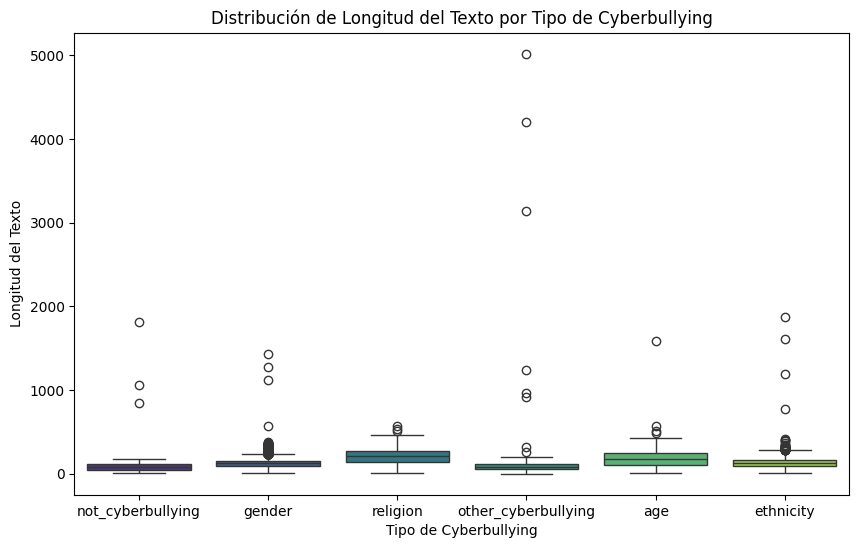

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_raw, x='cyberbullying_type', y='text_length' , palette='viridis')
plt.xlabel('Tipo de Cyberbullying')
plt.ylabel('Longitud del Texto')
plt.title('Distribución de Longitud del Texto por Tipo de Cyberbullying')
plt.show()

<ipython-input-5-1f1dfe19c997>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_raw, x='cyberbullying_type', y='sentiment', palette='viridis')


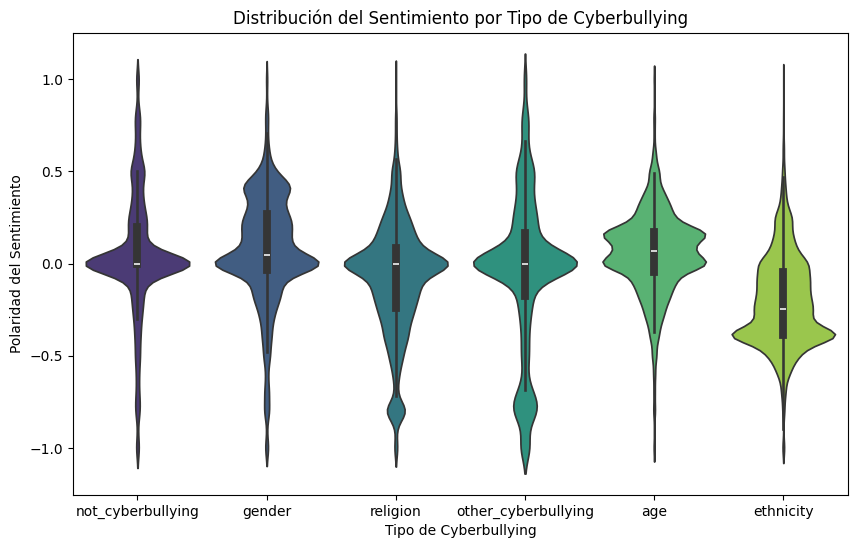

In [ ]:
df_raw['sentiment'] = df_raw['tweet_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

plt.figure(figsize=(10, 6))
sns.violinplot(data=df_raw, x='cyberbullying_type', y='sentiment', palette='viridis')
plt.xlabel('Tipo de Cyberbullying')
plt.ylabel('Polaridad del Sentimiento')
plt.title('Distribución del Sentimiento por Tipo de Cyberbullying')
plt.show()

In [ ]:
df_raw

,tweet_text,cyberbullying_type,text_length,sentiment
0,"In other words #katandandre, your food was cra...",not_cyberbullying,61,-0.156250
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,115,0.000000
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,60,0.200000
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,103,0.150000
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,103,0.000000
...,...,...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity,234,0.011905
47688,Turner did not withhold his disappointment. Tu...,ethnicity,276,-0.300000
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity,104,-0.387500
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity,90,-0.458333


### Codificamos las etiquetas de texto en valores numéricos.


In [3]:
cyberbullying_classes = {
    "not_cyberbullying": 0,
    "gender": 1,
    "religion": 2,
    "other_cyberbullying": 3,
    "age": 4,
    "ethnicity": 5
}

df_raw['cyberbullying_numeric_type'] = df_raw['cyberbullying_type'].map(cyberbullying_classes)

In [ ]:
df_raw.tail()

,tweet_text,cyberbullying_type,text_length,sentiment,cyberbullying_numeric_type
47687,"Black ppl aren't expected to do anything, depe...",ethnicity,234,0.011905,5
47688,Turner did not withhold his disappointment. Tu...,ethnicity,276,-0.300000,5
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity,104,-0.387500,5
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity,90,-0.458333,5
47691,Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...,ethnicity,76,-0.058333,5


### Preprocesamiento

In [4]:
nltk.download('punkt')
nltk.download('stopwords')

# Define la función clean_tweet
def clean_tweet(tweet:str) -> str:
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE) # Remove urls
    tweet = re.sub(r'@[A-Za-z0-9]+','', tweet) # Remove @mentions
    tweet = re.sub(r'\#[A-Za-z0-9]+','', tweet) # Remove hashtags
    tweet = re.sub(r'[^a-zA-Z\s]', '', tweet) # Remove special characters and punctuation
    tweet = tweet.lower() # Convert to lowercase

    tokens = word_tokenize(tweet) # Tokenize

    stop_words = set(stopwords.words('english')) # Remove stopwords
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

    clean_tweet = ' '.join(filtered_tokens) # Join tokens back into string

    return clean_tweet


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Se aplica la función clean_tweet a la columna 'tweet_text' y limpiamos los tweets de urls y caracteres especiales


In [5]:
df_raw['clean_tweet'] = df_raw['tweet_text'].apply(clean_tweet)

# mostramos los primeros registros del dataframe limpio
df_raw.head()

,tweet_text,cyberbullying_type,cyberbullying_numeric_type,clean_tweet
0,"In other words #katandandre, your food was cra...",not_cyberbullying,0,words food crapilicious
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,0,white
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,0,classy whore red velvet cupcakes
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,0,gio meh p thanks heads concerned another angry...
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,0,isis account pretending kurdish account like i...


### Contabilización de palabras

In [ ]:
def words_bar_charts(dataframe: pd.DataFrame, cyberbullying_classes: dict):
    num_classes = len(cyberbullying_classes)


    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12), sharey=True)

    axes = axes.ravel()

    viridis_colors = plt.cm.viridis(np.linspace(0, 1, num_classes))

    for i, (ax, (cyberbullying_type, value)) in enumerate(zip(axes, cyberbullying_classes.items())):
        df_filter = dataframe[dataframe['cyberbullying_numeric_type'] == value]

        text = ' '.join(df_filter['clean_tweet'].to_list())
        words = text.split()
        word_counts = Counter(words)
        top_words = word_counts.most_common(20)
        words, counts = zip(*top_words)

        ax.bar(words, counts, color=viridis_colors[i])
        ax.set_title(f'Top 20 palabras en tweets de tipo "{cyberbullying_type}"')
        ax.set_xlabel('Palabra')
        ax.set_ylabel('Cantidad')
        ax.tick_params(axis='x', rotation=45)

    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()


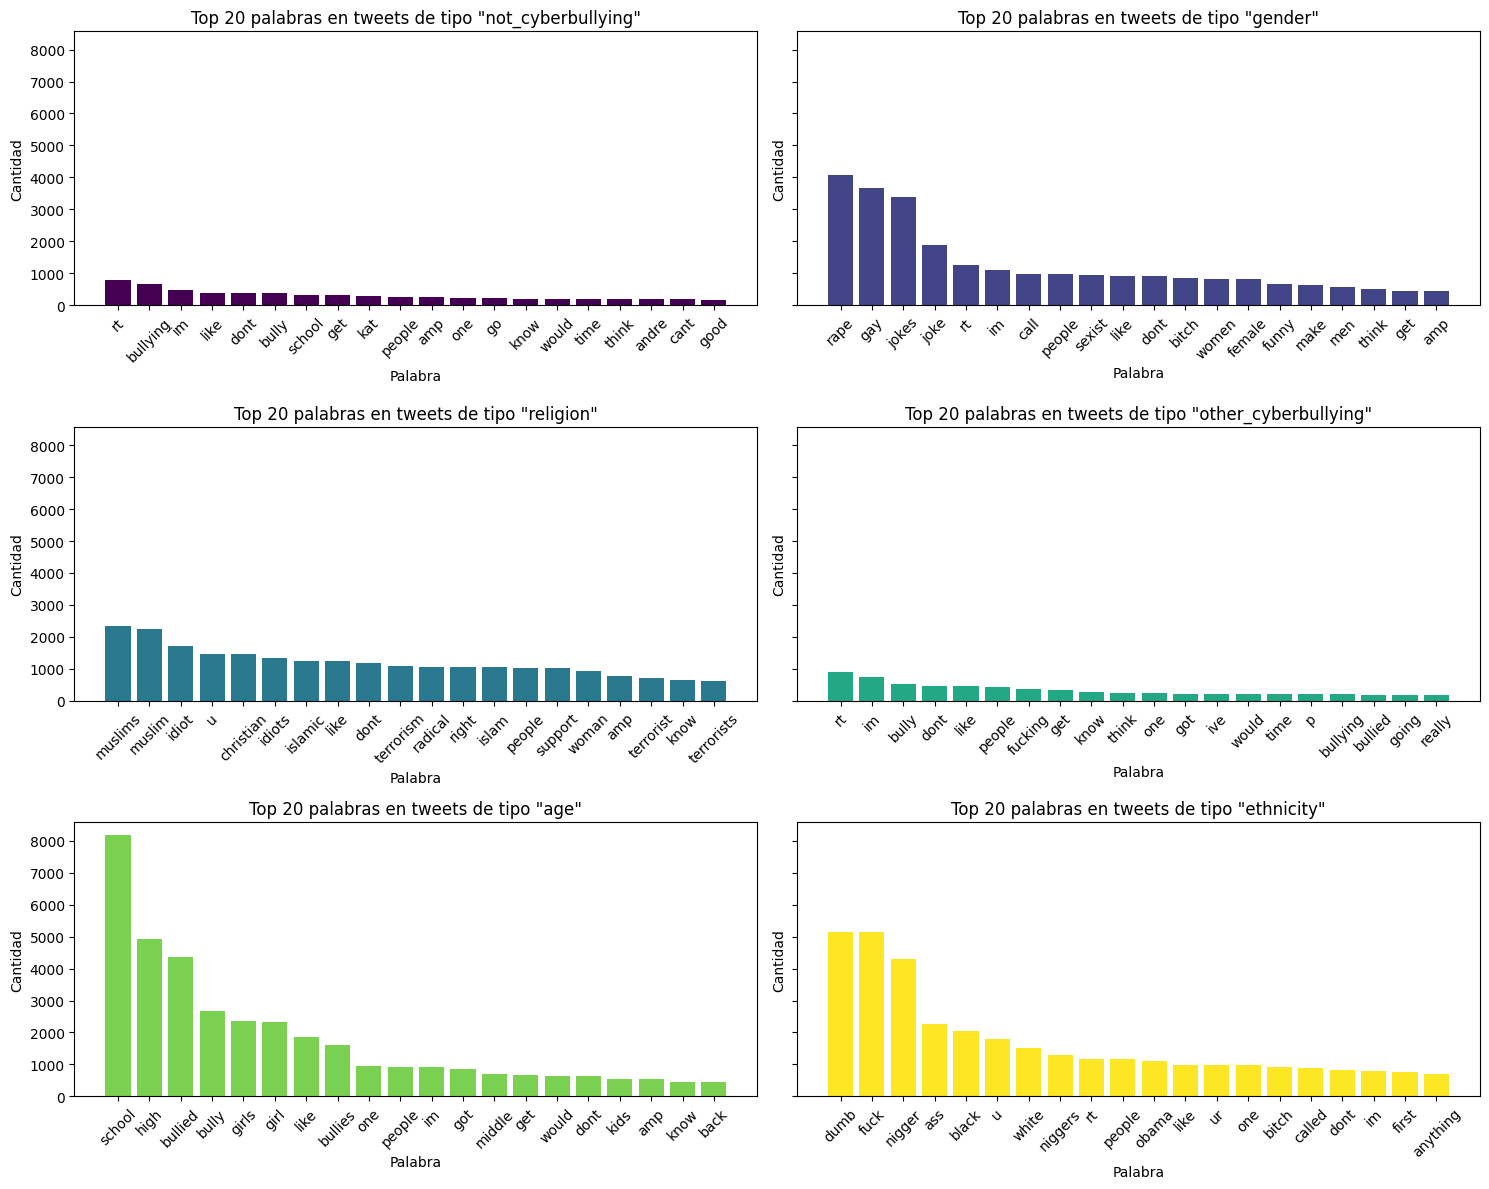

In [ ]:
words_bar_charts(df_raw, cyberbullying_classes)

In [ ]:
def wordcloud_subplots(dataframe: pd.DataFrame, cyberbullying_classes: dict):
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))

    axes = axes.ravel()

    for ax, (cyberbullying_type, value) in zip(axes, cyberbullying_classes.items()):
        df_filter = dataframe[dataframe['cyberbullying_numeric_type'] == value]

        text = ' '.join(df_filter['clean_tweet'].to_list())

        wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

        ax.imshow(wordcloud, interpolation='bilinear')
        ax.set_title(f'Nube de palabras para "{cyberbullying_type}"')
        ax.axis('off')

    for i in range(len(cyberbullying_classes), len(axes)):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

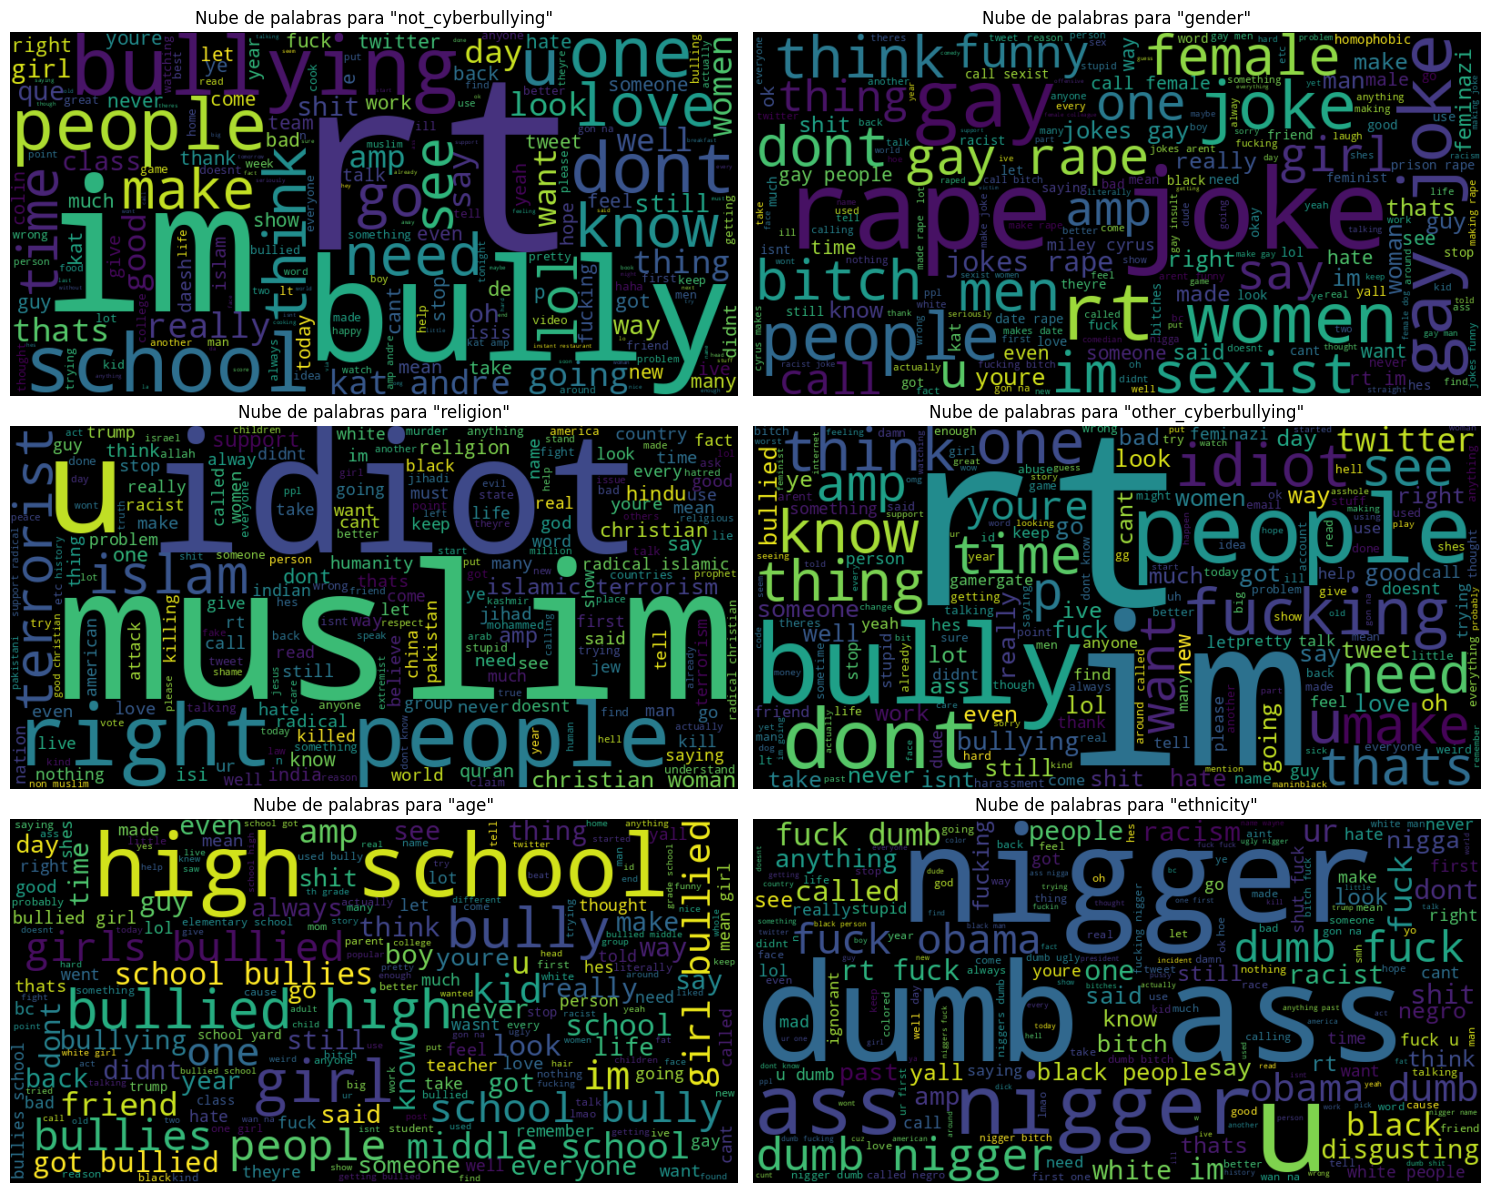

In [ ]:
wordcloud_subplots(df_raw, cyberbullying_classes)

### Análisis y tratamiento de Outliers

In [ ]:
nlp = spacy.load("en_core_web_sm")
# Función para extraer estadísticas de un tweet
def analyze_tweet_(text):
    doc = nlp(text)
    num_tokens = len(doc)
    num_words = len([token for token in doc if token.is_alpha])
    num_chars = len(text)
    num_stopwords = len([token for token in doc if token.is_stop])
    num_nouns = len([token for token in doc if token.pos_ == "NOUN"])
    num_verbs = len([token for token in doc if token.pos_ == "VERB"])

    return {
        'num_tokens': num_tokens,
        'num_words': num_words,
        'num_chars': num_chars,
        'num_stopwords': num_stopwords,
        'num_nouns': num_nouns,
        'num_verbs': num_verbs
    }

In [ ]:
# Aplicar la función a cada tweet en el DataFrame
stats = df_raw['clean_tweet'].apply(analyze_tweet_)

# Convertir la lista de diccionarios en un DataFrame
stats_df = pd.DataFrame(list(stats))

df_preprocessed = df_raw.copy()
# Añadir las estadísticas al DataFrame original
for column in stats_df.columns:
    df_preprocessed[column] = stats_df[column]

In [ ]:
df_preprocessed

,tweet_text,cyberbullying_type,text_length,cyberbullying_numeric_type,clean_tweet,num_tokens,num_words,num_chars,num_stopwords,num_nouns,num_verbs
0,"In other words #katandandre, your food was cra...",not_cyberbullying,61,0,words food crapilicious,3,3,23,0,2,0
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,115,0,white,1,1,5,0,0,0
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,60,0,classy whore red velvet cupcakes,5,5,32,0,3,0
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,103,0,gio meh p thanks heads concerned another angry...,10,10,59,1,5,1
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,103,0,isis account pretending kurdish account like i...,8,8,55,0,3,2
...,...,...,...,...,...,...,...,...,...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity,234,5,black ppl arent expected anything depended any...,23,23,153,5,5,5
47688,Turner did not withhold his disappointment. Tu...,ethnicity,276,5,turner withhold disappointment turner called c...,29,29,206,4,12,6
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity,104,5,swear god dumb nigger bitch got bleach hair re...,13,13,73,0,6,2
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity,90,5,yea fuck rt youre nigger fucking unfollow fuck...,11,11,62,2,3,1


In [ ]:
# Añadir tokenización y lematización
df_preprocessed['tokens'] = df_preprocessed['clean_tweet'].apply(lambda text: [token.text for token in nlp(text)])
df_preprocessed['lemmas'] = df_preprocessed['clean_tweet'].apply(lambda text: [token.lemma_ for token in nlp(text)])

In [ ]:
# Función para detectar outliers usando el IQR
def detect_outliers_(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

In [ ]:
# Detectar outliers en las columnas numéricas
outliers_num_tokens = detect_outliers_(df_preprocessed, 'num_tokens')
outliers_num_words = detect_outliers_(df_preprocessed, 'num_words')
outliers_num_chars = detect_outliers_(df_preprocessed, 'num_chars')

# Opcional: Tratar los outliers (por ejemplo, eliminarlos)
# df_cleaned = df_raw[~df_raw.index.isin(outliers_num_tokens.index)]
# df_cleaned = df_cleaned[~df_cleaned.index.isin(outliers_num_words.index)]
# df_cleaned = df_cleaned[~df_cleaned.index.isin(outliers_num_chars.index)]

# Mostrar el DataFrame resultante
df_preprocessed

,tweet_text,cyberbullying_type,text_length,sentiment,cyberbullying_numeric_type,clean_tweet,num_tokens,num_words,num_chars,num_stopwords,num_nouns,num_verbs
0,"In other words #katandandre, your food was cra...",not_cyberbullying,61,-0.156250,0,words food crapilicious,3,3,23,0,2,0
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,115,0.000000,0,white,1,1,5,0,0,0
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,60,0.200000,0,classy whore red velvet cupcakes,5,5,32,0,3,0
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,103,0.150000,0,gio meh p thanks heads concerned another angry...,10,10,59,1,5,1
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,103,0.000000,0,isis account pretending kurdish account like i...,8,8,55,0,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity,234,0.011905,5,black ppl arent expected anything depended any...,23,23,153,5,5,5
47688,Turner did not withhold his disappointment. Tu...,ethnicity,276,-0.300000,5,turner withhold disappointment turner called c...,29,29,206,4,12,6
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity,104,-0.387500,5,swear god dumb nigger bitch got bleach hair re...,13,13,73,0,6,2
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity,90,-0.458333,5,yea fuck rt youre nigger fucking unfollow fuck...,11,11,62,2,3,1


In [ ]:
df_preprocessed.describe()

,text_length,sentiment,cyberbullying_numeric_type,num_tokens,num_words,num_chars,num_stopwords,num_nouns,num_verbs
count,47692.000000,47692.000000,47692.000000,47692.000000,47692.000000,47692.000000,47692.000000,47692.000000,47692.000000
mean,136.253229,-0.027226,2.499602,13.502831,13.502831,82.619748,1.811897,4.518871,2.878177
std,85.226899,0.324770,1.708993,8.906402,8.906402,56.677206,1.979130,3.375993,2.319892
min,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,78.000000,-0.192857,1.000000,7.000000,7.000000,43.000000,0.000000,2.000000,1.000000
50%,124.000000,0.000000,2.000000,12.000000,12.000000,70.000000,1.000000,4.000000,2.000000
75%,180.000000,0.158688,4.000000,19.000000,19.000000,114.000000,3.000000,6.000000,4.000000
max,5018.000000,1.000000,5.000000,428.000000,428.000000,2652.000000,71.000000,142.000000,91.000000


### Eliminamos tweets de 1 sola palabra

In [6]:
df_final = df_raw.copy()

In [7]:
df_final['word_count'] = df_final['clean_tweet'].apply(lambda x: len(str(x).split()))
df_final = df_final[df_final['word_count'] > 1]

In [8]:
df_final.shape

(46396, 5)

### Eliminamos tweets catalogados como other_cyberbullying

In [9]:
df_final= df_final[df_final['cyberbullying_type'] != 'other_cyberbullying']

In [10]:
df_final.shape

(39256, 5)

In [11]:
categorias_unicas = df_final.iloc[:, 1].unique()

print("Categorías existentes en la columna cyberbullying_type:")
for categoria in categorias_unicas:
    print(categoria)

Categorías existentes en la columna cyberbullying_type:
not_cyberbullying
gender
religion
age
ethnicity


### Verificamos nuevamente balanceo de clases luego de la limpieza y preprocesamiento

<ipython-input-12-8f42b4d0e7f5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_final, x='cyberbullying_type', palette='viridis')


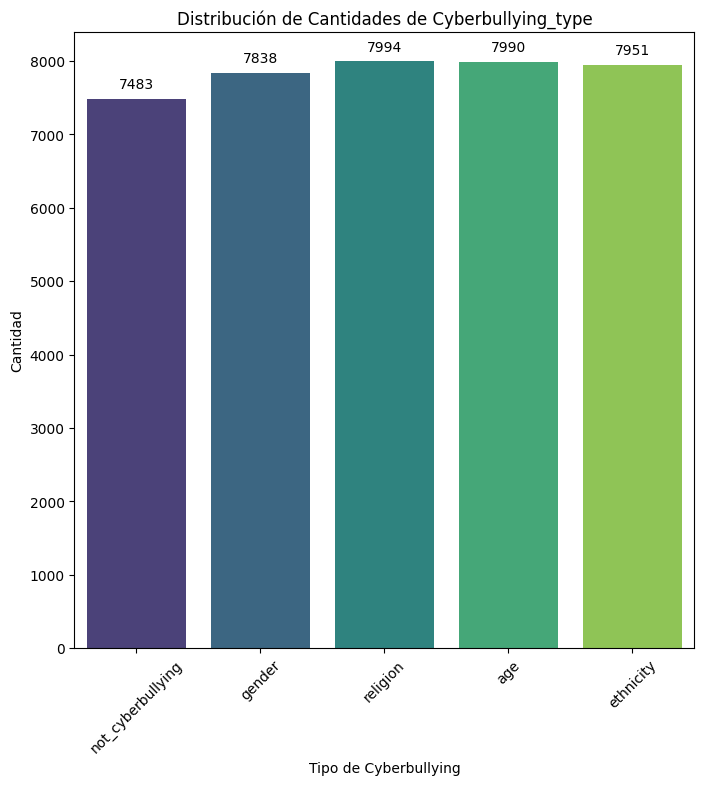

In [12]:
plt.figure(figsize=(8, 8))
ax = sns.countplot(data=df_final, x='cyberbullying_type', palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Tipo de Cyberbullying')
plt.ylabel('Cantidad')
plt.title('Distribución de Cantidades de Cyberbullying_type')
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,
        p.get_height() + 100,
        f'{int(p.get_height())}',
        ha='center',
        va='bottom'
    )

plt.show()

## MODELADO

##DistilBert  
Versión más pequeña y rápida de BERT que retiene el 97% del rendimiento de BERT pero es más eficiente computacionalmente.

Ideal para: Entornos con limitaciones de recursos.

In [13]:
cyberbullying_classes_final = {
    "not_cyberbullying": 0,
    "gender": 1,
    "religion": 2,
    "age": 3,
    "ethnicity": 4
}

df_final['cyberbullying_numeric_type'] = df_final['cyberbullying_type'].map(cyberbullying_classes_final)

In [14]:
df_final['cyberbullying_numeric_type']

0        0
2        0
3        0
4        0
5        0
        ..
47687    4
47688    4
47689    4
47690    4
47691    4
Name: cyberbullying_numeric_type, Length: 39256, dtype: int64

In [15]:
# Configuración de CUDA para poder debuggear
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

# Definir el tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Tokenizar los datos
def tokenize_tweets(tweets):
    return tokenizer(tweets.tolist(), padding=True, truncation=True, return_tensors='pt')

# Dataset personalizado para Pytorch
class TweetDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Número de particiones para la validación cruzada
k_folds = 3
kf = KFold(n_splits=k_folds, shuffle=True)

# Métricas de evaluación
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'precision': precision,
        'recall': recall,
        'f1': f1,
    }

# Guardar resultados de cada fold
results = []
labels_list = []

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [ ]:
# Realizar la validación cruzada
for fold, (train_index, val_index) in enumerate(kf.split(df_final)):
    print(f'Fold {fold + 1}/{k_folds}')

    train_df = df_final.iloc[train_index]
    val_df = df_final.iloc[val_index]

    train_encodings = tokenizer(train_df['clean_tweet'].tolist(), padding=True, truncation=True, return_tensors='pt')
    val_encodings = tokenizer(val_df['clean_tweet'].tolist(), padding=True, truncation=True, return_tensors='pt')

    train_dataset = TweetDataset(train_encodings, train_df['cyberbullying_numeric_type'].values)
    val_dataset = TweetDataset(val_encodings, val_df['cyberbullying_numeric_type'].values)

    # Inicializar un nuevo modelo para cada fold
    model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=5)

    training_args = TrainingArguments(
        output_dir=f'./results_fold_{fold}',
        num_train_epochs=3,
        per_device_train_batch_size=16,
        per_device_eval_batch_size=16,
        warmup_steps=500,
        weight_decay=0.01,
        logging_dir=f'./logs_fold_{fold}',
        logging_steps=10,
        eval_strategy='epoch',
        save_strategy='epoch',
        save_total_limit=1,
        load_best_model_at_end=True,
    )

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
        compute_metrics=compute_metrics
    )

    # Entrenar el modelo
    trainer.train()

    # Evaluar el modelo
    eval_result = trainer.evaluate()
    results.append(eval_result)

    # Obtener las predicciones
    preds = trainer.predict(val_dataset)
    labels_list.append((val_df['cyberbullying_numeric_type'].values, preds.predictions.argmax(-1)))

Fold 1/3


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.191900,0.209048,0.935580,0.935012,0.935580,0.935175
2,0.230200,0.187903,0.936115,0.937806,0.936115,0.936771
3,0.063300,0.260295,0.939707,0.940138,0.939707,0.939638
4,0.040700,0.327371,0.940700,0.941110,0.940700,0.940841
5,0.004200,0.366155,0.938255,0.938413,0.938255,0.938322


Fold 2/3


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.160100,0.214532,0.932365,0.935840,0.932365,0.933414
2,0.215700,0.196782,0.938021,0.939513,0.938021,0.938528
3,0.078800,0.272801,0.935881,0.937242,0.935881,0.936086
4,0.083300,0.352509,0.933512,0.934302,0.933512,0.933839
5,0.026200,0.409761,0.933817,0.934451,0.933817,0.933989


Fold 3/3


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.132300,0.212507,0.933665,0.935078,0.933665,0.934080
2,0.074000,0.222784,0.934047,0.934224,0.934047,0.934047


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.132300,0.212507,0.933665,0.935078,0.933665,0.934080
2,0.074000,0.222784,0.934047,0.934224,0.934047,0.934047
3,0.117200,0.287064,0.936645,0.938523,0.936645,0.937225


In [ ]:
# Extraer las métricas de cada fold
accuracy = [result['eval_accuracy'] for result in results]
precision = [result['eval_precision'] for result in results]
recall = [result['eval_recall'] for result in results]
f1 = [result['eval_f1'] for result in results]

print(f"Accuracy: {np.mean(accuracy)} ± {np.std(accuracy)}")
print(f"Precision: {np.mean(precision)} ± {np.std(precision)}")
print(f"Recall: {np.mean(recall)} ± {np.std(recall)}")
print(f"F1 Score: {np.mean(f1)} ± {np.std(f1)}")

In [ ]:
# Mostrar la matriz de confusión para cada fold
labels = list(cyberbullying_classes_final.values())
for i, (true_labels, pred_labels) in enumerate(labels_list):
    print(f"Fold {i + 1}")
    plot_confusion_matrix(true_labels, pred_labels, labels)

##Red neuronal personalizada
CAPAS:  
Embedding (GloVe)  
SpatialDropout1D  
LSTM  
LSTM  
Dense (Softmax)

In [ ]:
# Configuración para el tokenizer
max_words = 5000
max_len = 50 #Este parámetro define la longitud máxima de las secuencias (tweets) después de ser tokenizadas. Los tweets tienen una longitud máxima de 280 caracteres, lo que suele traducirse en alrededor de 50 palabras como promedio.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pickle
# Cargar embeddings preentrenados de GloVe para Twitter : modelo GloVe de Stanford, que tiene una versión entrenada en 2 mil millones de tweets.
embedding_dim = 100
embedding_index = {}
pkl_file = '/content/drive/MyDrive/glove.twitter.27B.100d.pkl'

# Cargar el archivo .pkl
with open(pkl_file, 'rb') as f:
    embedding_index = pickle.load(f)

# Crear la matriz de embedding
def create_embedding_matrix(tokenizer, max_words, embedding_dim, embedding_index):
    embedding_matrix = np.zeros((max_words, embedding_dim))
    for word, i in tokenizer.word_index.items():
        if i < max_words:
            embedding_vector = embedding_index.get(word)
            if embedding_vector is not None:
                embedding_matrix[i] = embedding_vector
    return embedding_matrix


In [ ]:
# Inicializar KFold
k_folds = 3
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Guardar resultados de cada fold
results = []
labels_list = []

# Realizar validación cruzada
for fold, (train_index, val_index) in enumerate(kf.split(df_final)):
    print(f'Fold {fold + 1}/{k_folds}')

    train_df = df_final.iloc[train_index]
    val_df = df_final.iloc[val_index]

    # Tokenización de los tweets
    tokenizer = Tokenizer(num_words=max_words, lower=True, oov_token="<OOV>")
    tokenizer.fit_on_texts(train_df['clean_tweet'])

    train_sequences = tokenizer.texts_to_sequences(train_df['clean_tweet'])
    train_padded = pad_sequences(train_sequences, maxlen=max_len)

    val_sequences = tokenizer.texts_to_sequences(val_df['clean_tweet'])
    val_padded = pad_sequences(val_sequences, maxlen=max_len)

    # Definir las etiquetas
    train_labels = np.array(train_df['cyberbullying_numeric_type'])
    val_labels = np.array(val_df['cyberbullying_numeric_type'])

    # Crear la matriz de embedding
    embedding_matrix = create_embedding_matrix(tokenizer, max_words, embedding_dim, embedding_index)

    # Definir la red LSTM con embeddings preentrenados
    model = Sequential()
    model.add(Embedding(input_dim=max_words,
                    output_dim=embedding_dim,
                    input_length=max_len,
                    weights=[embedding_matrix],
                    trainable=False))
    model.add(SpatialDropout1D(0.2))
    model.add(LSTM(1000, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
    model.add(LSTM(1000, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(5, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Entrenar el modelo
    model.fit(train_padded, train_labels, epochs=5, batch_size=16, validation_data=(val_padded, val_labels), verbose=1)

    # Evaluar el modelo
    val_predictions = model.predict(val_padded)
    val_predicted_labels = np.argmax(val_predictions, axis=1)
    results.append(classification_report(val_labels, val_predicted_labels, output_dict=True))

    # Guardar las etiquetas verdaderas y predichas
    labels_list.append((val_labels, val_predicted_labels))

In [ ]:
classes = list(cyberbullying_classes_final.keys())

In [ ]:
# Extraer las métricas de cada fold
accuracy = [result['accuracy'] for result in results]
precision = [result['weighted avg']['precision'] for result in results]
recall = [result['weighted avg']['recall'] for result in results]
f1 = [result['weighted avg']['f1-score'] for result in results]

print(f"Accuracy: {np.mean(accuracy)} ± {np.std(accuracy)}")
print(f"Precision: {np.mean(precision)} ± {np.std(precision)}")
print(f"Recall: {np.mean(recall)} ± {np.std(recall)}")
print(f"F1 Score: {np.mean(f1)} ± {np.std(f1)}")

# Crear etiquetas para la matriz de confusión
labels = list(range(len(classes)))

# Iterar sobre los resultados de cada fold
# Iterar sobre los resultados de cada fold
for i, (true_labels, pred_labels) in enumerate(labels_list):
    print(f"Fold {i + 1}")
    cm = confusion_matrix(true_labels, pred_labels, labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot(cmap='coolwarm')

    # Rotar los labels del eje x
    plt.xticks(rotation=45)

    plt.show()